# SOK-1006 Mikro
## Seminar 1

### Oppgave 1

#### Deloppgave (b)
Tegn etterspørsel - se Espen sin Notebook 3 om matplotlib fra SOK-1003

In [1]:
# importer pakkene som vi trenger
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [2]:
# definer symbolene som vi kommer til å bruke
x,a,b,A,B,p=sp.symbols('x a b A B p')

In [3]:
# Etterspørsel med pris p og kvantum x
# x=a - b*p
# NB vi trenger x>0 dvs a/b > p

def demand(p, a, b):
    return a - b*p


[(0.0, 60.0)]

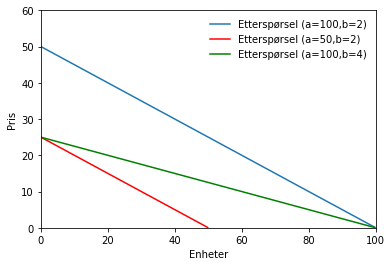

In [4]:
# tegn etterspørsel

# tegn 100 punkter 0-100
p_ny = np.linspace(0.1,100,100)


fig,ax=plt.subplots()
ax.set_ylabel('Pris')
ax.set_xlabel('Enheter')

# tegn etterspørsel for forskjellige verdier på a, b

ax.plot(demand(p_ny, 100, 2), p_ny,label='Etterspørsel (a=100,b=2)')
ax.plot(demand(p_ny, 50, 2),p_ny,color="red",label='Etterspørsel (a=50,b=2)')
ax.plot(demand(p_ny, 100, 4), p_ny,color="green",label='Etterspørsel (a=100,b=4)')

#legend:
ax.legend(loc='upper right', frameon=False)



ax.set(xlim=(0,100))
ax.set(ylim=(0,60))


Sammenlikner vi de blå og røde linjene: en økning i a fører til et parallelt skift utover i etterspørsel. En økning i inntekt for eksempel.
Se på den blå og den grønne: en økning i b gir flatere etterspørsel. Kvantum er mer følsom for prisendringer. Muligens fordi en alternativ vare er blitt tilgjengelig (eller blitt billigere).

### deloppgave (d)

In [5]:
# Tilbud x=-A+B*p

def supply(p, A, B):
    return -A+B*p

[(0.0, 100.0)]

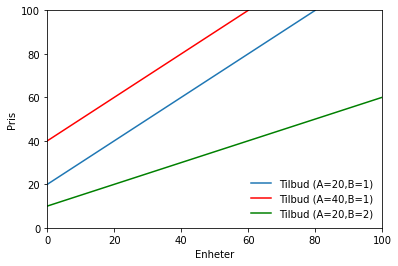

In [6]:
# tegn tilbud



fig,ax=plt.subplots()
ax.set_ylabel('Pris')
ax.set_xlabel('Enheter')

# tegn tilbud for forskjellige verdier på Alfa, Beta

ax.plot(supply(p_ny, 20, 1), p_ny,label='Tilbud (A=20,B=1)')
ax.plot(supply(p_ny, 40, 1),p_ny, color="red",label='Tilbud (A=40,B=1)')
ax.plot(supply(p_ny, 20, 2),p_ny, color="green",label='Tilbud (A=20,B=2)')

#legend:
ax.legend(loc='lower right', frameon=False)



ax.set(xlim=(0,100))
ax.set(ylim=(0,100))


Blå/rød: en økning i A fører til et parallelt skift innover til venstre. Økte produksjonskostnader for eksempel.
Blå/grønn: en økning i B gir en flatere tilbudskurve. Flere produsenter i markedet for eksempel, eller teknologisk endring som gjør det lettere å produsere varen.

### deloppgave (e)

La oss illustrere likevekten ved å tegne et eksempel på tilbud og etterspørsel

(0.0, 60.0)

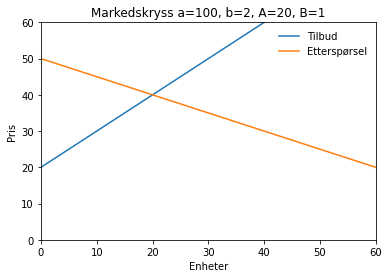

In [7]:
# a=100, b=2, A=20, B=1


# tegn tilbud
plt.plot(supply(p_ny,20,1),p_ny,label='Tilbud')

# og etterspørsel
plt.plot(demand(p_ny,100,2),p_ny,label='Etterspørsel')

#legend:
plt.legend(loc='upper right', frameon=False)

#title
plt.title ('Markedskryss a=100, b=2, A=20, B=1')

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

plt.ylim((0,60))
plt.xlim((0,60))

#### Løs for likevekten - Se Espen sin notebook 5 om Sympy fra SOK-1003

In [8]:
# x,a,b,A,B,p=sp.symbols('x a b A B p')
eq_cond=sp.Eq(demand(p,a,b),supply(p,A,B))
eq_cond

Eq(a - b*p, -A + B*p)

In [9]:
# likevektspris
p_eq=sp.solve(eq_cond,p)[0]
p_eq

(A + a)/(B + b)

In [10]:
# likevektskvantum
x_eq=demand(p_eq,a,b)
print(f"""
Likevektspris er {p_eq}
Likevektskvantum er {sp.simplify (x_eq)}
""")


Likevektspris er (A + a)/(B + b)
Likevektskvantum er (-A*b + B*a)/(B + b)



#### deloppgave (f)
La oss først beregne hvordan likevektsprisen og -kvantum påvirkes av endringer i parametrene.

In [11]:
# Effekten av endring i a på likevektspris
diff_p_a=sp.diff(p_eq,a)
print(f"""
En økning i a gir denne effekten på likevektsprisen: {sp.simplify(diff_p_a)}

""")



En økning i a gir denne effekten på likevektsprisen: 1/(B + b)




In [12]:
# Effekten av endring i b på likevektspris
diff_p_b=sp.diff(p_eq,b)
print(f"""
En økning i b gir denne effekten på likevektsprisen: {sp.simplify(diff_p_b)}
""")



En økning i b gir denne effekten på likevektsprisen: -(A + a)/(B + b)**2



In [13]:
# Effekten av endring i A på likevektspris
diff_p_A=sp.diff(p_eq,A)
print(f"""
En økning i A gir denne effekten på likevektsprisen: {sp.simplify(diff_p_A)}

""")


En økning i A gir denne effekten på likevektsprisen: 1/(B + b)




In [14]:
# Effekten av endring i B på likevektspris
diff_p_B=sp.diff(p_eq,B)
print(f"""
En økning i B gir denne effekten på likevektsprisen: {sp.simplify(diff_p_B)}

""")


En økning i B gir denne effekten på likevektsprisen: -(A + a)/(B + b)**2




#### Figurer

(0.0, 100.0)

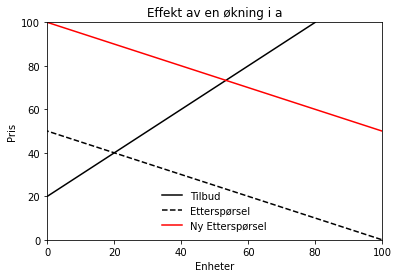

In [15]:
# Vi tegner eksempelet ovenfor, og endrer én parameter 

# Øk a til a=200, alt ellers likt

# a=200, b=2, A=20, B=1



# tegn opprinnelig tilbud og etterspørsel i sort
plt.plot(supply(p_ny,20,1),p_ny,color='black',label='Tilbud')

plt.plot(demand(p_ny,100,2),p_ny, color='black',linestyle='dashed',label='Etterspørsel')



# og ny etterspørsel (rødt)
plt.plot(demand(p_ny,200,2),p_ny,color='red',label='Ny Etterspørsel')

#legend:
plt.legend(loc='lower center', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

# tittel
plt.title("Effekt av en økning i a")

plt.ylim((0,100))
plt.xlim((0,100))

(0.0, 100.0)

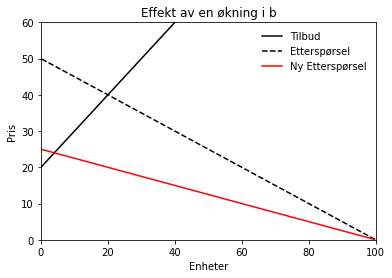

In [16]:
# Øk b til b =4, alt ellers likt

# a=100, b=4, A=20, B=1

# tegn opprinnelig tilbud og etterspørsel i sort
plt.plot(supply(p_ny,20,1),p_ny,color='black',label='Tilbud')

plt.plot(demand(p_ny,100,2),p_ny,color='black',linestyle='dashed',label='Etterspørsel')



# og ny etterspørsel (rødt)
plt.plot(demand(p_ny,100,4), p_ny,color='red',label='Ny Etterspørsel')

#legend:
plt.legend(loc='upper right', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

# tittel
plt.title("Effekt av en økning i b")

plt.ylim((0,60))
plt.xlim((0,100))

(0.0, 60.0)

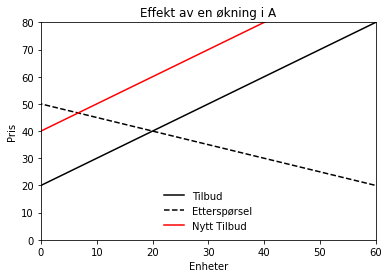

In [17]:
# Øk A til A=40, alt ellers likt

# a=100, b=2, A=40, B=1



# tegn opprinnelig tilbud og etterspørsel i sort
plt.plot(supply(p_ny,20,1),p_ny,color='black',label='Tilbud')

plt.plot(demand(p_ny,100,2),p_ny,color='black',linestyle='dashed',label='Etterspørsel')



# og nytt tilbud (rødt)
plt.plot(supply(p_ny,40,1),p_ny,color='red',label='Nytt Tilbud')


#legend:
plt.legend(loc='lower center', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

# tittel
plt.title("Effekt av en økning i A")

plt.ylim((0,80))
plt.xlim((0,60))

(0.0, 60.0)

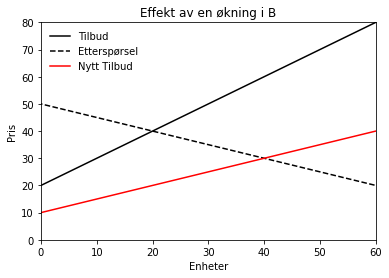

In [18]:
# Øk B til B=2, alt ellers likt

# a=100, b=2, A=20, B=2



# tegn opprinnelig tilbud og etterspørsel i sort
plt.plot(supply(p_ny,20,1),p_ny,color='black',label='Tilbud')

plt.plot(demand(p_ny,100,2),p_ny,color='black',linestyle='dashed',label='Etterspørsel')



# og nytt tilbud (rødt)
plt.plot(supply(p_ny,20,2),p_ny,color='red',label='Nytt Tilbud')


#legend:
plt.legend(loc='upper left', frameon=False)

#axis lables
plt.ylabel('Pris')
plt.xlabel('Enheter')

# tittel
plt.title("Effekt av en økning i B")

plt.ylim((0,80))
plt.xlim((0,60))
